<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-solution-of-digit-recognizer?scriptVersionId=162288082" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Digit Recognizer Competition

![](https://www.researchgate.net/profile/Hugo-Larochelle/publication/200744481/figure/fig1/AS:668968306098181@1536505881710/Samples-from-the-MNIST-digit-recognition-data-set-Here-a-black-pixel-corresponds-to-an.png)

# <span style="color: gray">Table of Contents</span>

1. [Import libraries](#1)
2. [Load the data with digits](#2)
3. [Split the data into X and Y](#3)
4. [Shape of the data](#4)
5. [Transform data in float 64 format for higher accuracy](#5)
6. [Normalize and reshape the data](#6)
7. [One-hot encoding for labels](#7)
8. [Creating LeNet-5 model](#8)
9. [Compile the model](#9)
10. [Fit the model](#10)
11. [Make predictions and return predicted labels](#11)
12. [Create submission file](#12)

In [2]:
# from IPython.core.display import HTML

# HTML("<style>.jp-Notebook { background-color: #eed7fc; }</style>")

<a id='1'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">1 - Import libraries</span>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.utils import to_categorical

<a id='2'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">2. Load the data with digits</span>

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id='3'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">3. Split the data into X and Y</span>

In [6]:
X = train.drop('label', axis=1)
y = train.label

In [7]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
train.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<a id='4'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">4. Shape of the data</span>

In [9]:
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)


###### In origal MNIST dataset there are 60.000 train images and 10.000 test images

<a id='5'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">5. Transform data in float 64 format for higher accuracy</span>

In [10]:
X = X.astype('float64')
test = test.astype('float64')

<a id='6'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">6. Normalize and reshape the data</span>

In [11]:
X = X.to_numpy()
test = test.to_numpy()

X = X / 255
test /= 255

X = X.reshape((X.shape[0], 28, 28, 1))
test = test.reshape((test.shape[0], 28, 28, 1))

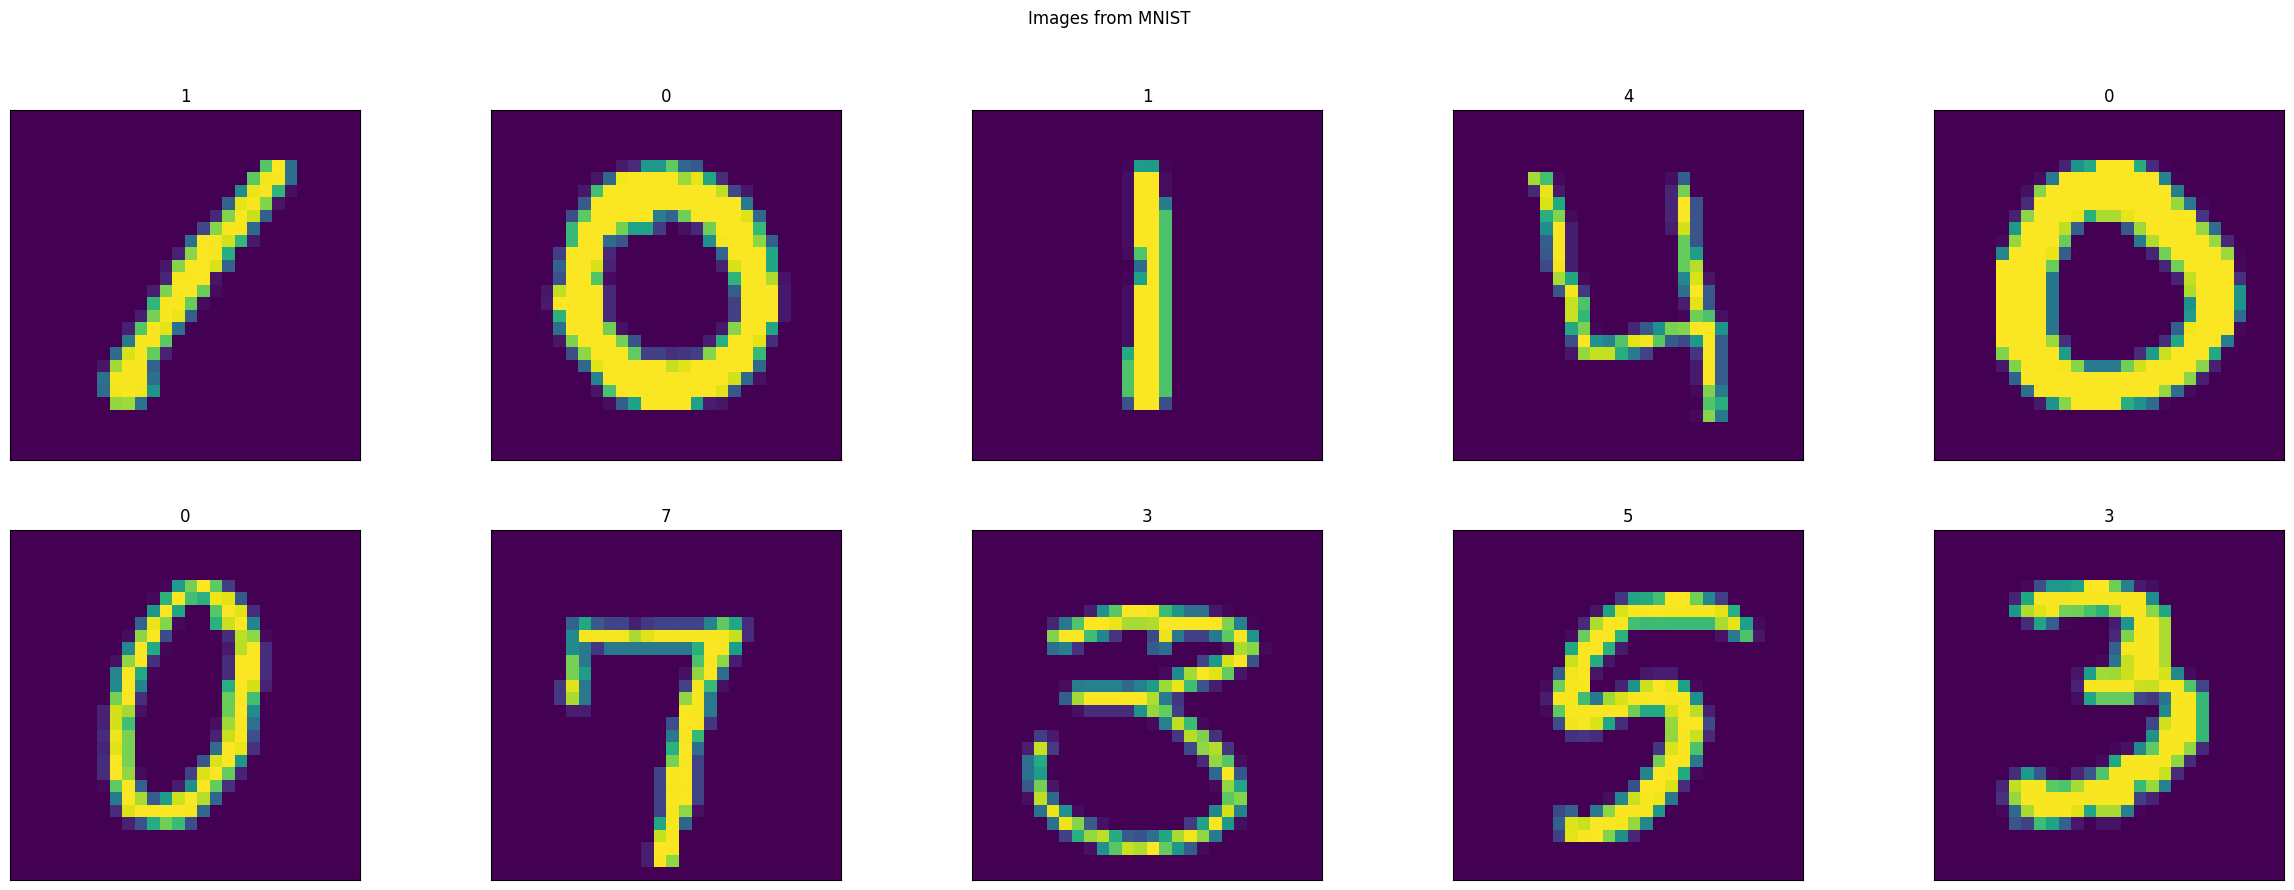

In [12]:
# Let's look at the digits
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
fig.suptitle('Images from MNIST')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i])
    plt.xticks([])  # Remove coordinates from axes
    plt.yticks([])
    plt.title(y[i])
plt.show();

<a id='7'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">7. One-hot encoding for labels</span>

In [13]:
y = to_categorical(y, num_classes=10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id='8'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">8. Creating LeNet-5 model</span>

![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

### Let's change Average to MaxPooling2D

In [14]:
model = Sequential()

# Convolutions 1 (layer 1)
model.add(Conv2D(
    filters=6,
    kernel_size=(5, 5),
    activation='tanh',
    input_shape=(28, 28, 1)
))
model.add(Dropout(0.2))

# Subsampling 1 (layer 2)
model.add(AveragePooling2D(pool_size=(2, 2)))


# Convolutions 2 (layer 3)
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(Dropout(0.2))

# Subsampling 2 (layer 4)
model.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers (layers 5-7)
model.add(Dense(units=120, activation='tanh'))
model.add(Dense(units=84, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))

#### [Article where I found this architecture](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)

<a id='9'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">9. Compile the model</span>

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
# Add early stopping using callback
from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     min_delta=0.0001,  # minimum amount of change to count as an improvement
#     patience=100,  # how many epochs to wait before stopping
#     restore_best_weights=True
# )

<a id='10'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">10. Fit the model<span>

In [17]:
%%time
history = model.fit(
    X,
    y,
    validation_split=0.2,
    # validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=27,
#     callbacks=[early_stopping]  # put your callbacks in a list
)

Epoch 1/27
263/263 [==============================] - 14s 47ms/step - loss: 0.4972 - accuracy: 0.8533 - val_loss: 0.2432 - val_accuracy: 0.9265
Epoch 2/27
263/263 [==============================] - 11s 43ms/step - loss: 0.2148 - accuracy: 0.9344 - val_loss: 0.1542 - val_accuracy: 0.9539
Epoch 3/27
263/263 [==============================] - 11s 42ms/step - loss: 0.1461 - accuracy: 0.9560 - val_loss: 0.1169 - val_accuracy: 0.9643
Epoch 4/27
263/263 [==============================] - 12s 44ms/step - loss: 0.1160 - accuracy: 0.9636 - val_loss: 0.0959 - val_accuracy: 0.9688
Epoch 5/27
263/263 [==============================] - 11s 42ms/step - loss: 0.0941 - accuracy: 0.9715 - val_loss: 0.0922 - val_accuracy: 0.9714
Epoch 6/27
263/263 [==============================] - 12s 44ms/step - loss: 0.0802 - accuracy: 0.9747 - val_loss: 0.0777 - val_accuracy: 0.9757
Epoch 7/27
263/263 [==============================] - 11s 42ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0700 - val_accuracy:

Minimum validation loss: 0.05525067821145058


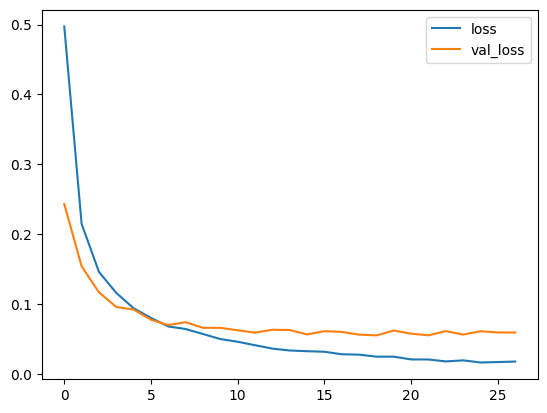

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(f'Minimum validation loss: {history_df.val_loss.min()}')

<a id='11'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">11. Make predictions and return predicted labels</span>

![](https://media.licdn.com/dms/image/C5612AQEmGTOPSvfx3w/article-cover_image-shrink_600_2000/0/1614676838636?e=2147483647&v=beta&t=Xms5SS3IGEIlT17aVE5OBRFWrgZ00NBZHdffmiLCIh8)

In [19]:
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

875/875 [==============================] - 4s 4ms/step


<a id='12'></a>
# <span style="color: gray; border-left: 8px solid purple; padding-left: 15px; background-color: #ffd9fd; padding-right: 15px;">12. Create submission file</span>

In [20]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [21]:
submission = pd.DataFrame({
    'ImageId': range(1, len(predicted_labels) + 1), 
    'Label': predicted_labels
})

submission.to_csv('Digit_Recognition_submission.csv', index=False)
submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


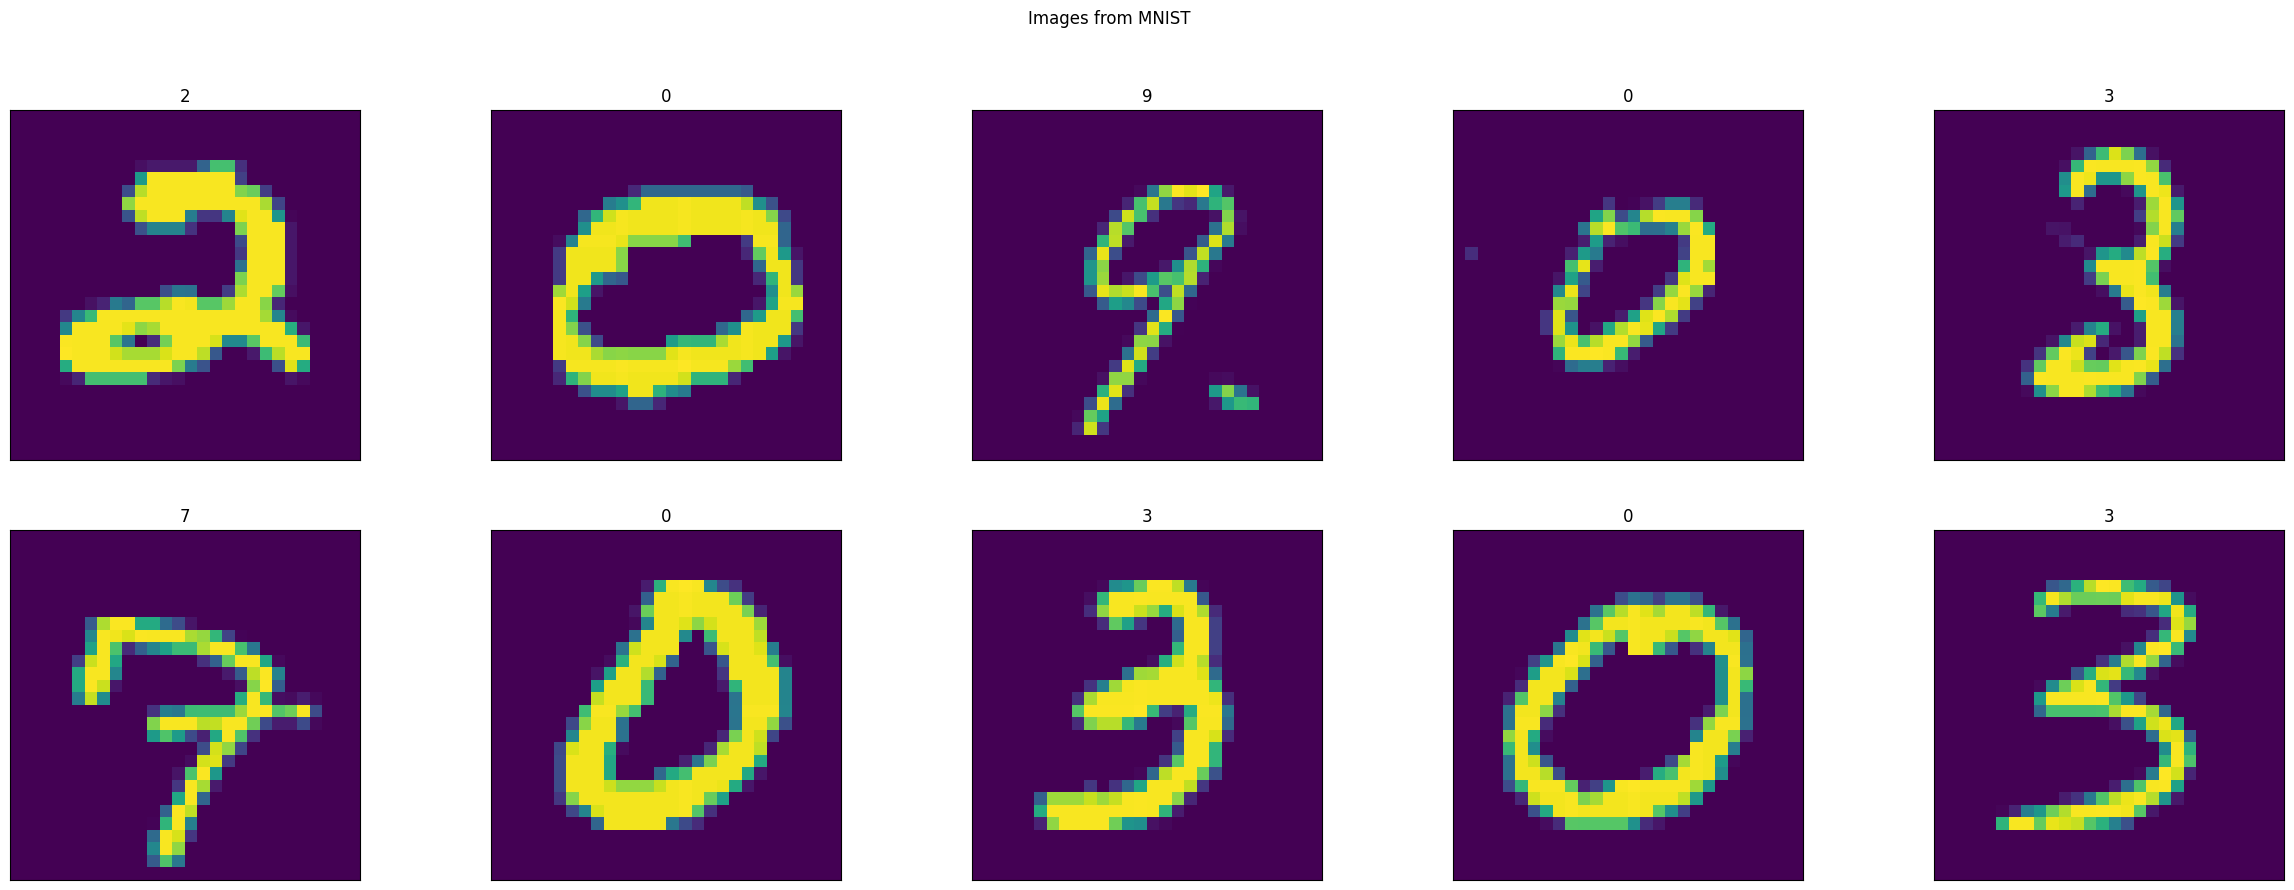

In [22]:
# Let's look at the predictions
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
fig.suptitle('Images from MNIST')

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test[i])
    plt.xticks([])  # Remove coordinates from axes
    plt.yticks([])
    plt.title(submission.Label[i])
plt.show();